Random Forest

Imports

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, accuracy_score, mean_squared_error,
    f1_score, classification_report
)

Import Dataset

In [6]:
DATASET_PATH = "../data/output/tfidf_dataset.csv"
RNG = 42  # Random seed

df = pd.read_csv(DATASET_PATH)

print(df['cyberbullying'].value_counts())
df.head(10)

cyberbullying
0    16225
1    16225
Name: count, dtype: int64


,10th,12th,15th,16th,1960s,19th,19th century,1px,1px solid,1st,...,zealand,zero,zionist,zoe,zone,zoo,zuck,zuckerberg,ŷour,cyberbullying
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Fitting

In [10]:

# 1. Separate features and labels
X = df.drop(columns=['cyberbullying'])  # TF-IDF features
y = df["cyberbullying"]

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RNG
)

# Random Forest
rf = RandomForestClassifier(random_state=RNG)

param_grid = {
    "n_estimators": [100],       
    "max_depth": [10, 15],
    "min_samples_split": [2],    
    "min_samples_leaf": [1, 2], 
    "class_weight": ["balanced"]
}
# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RNG)

# Grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=cv,
    n_jobs=1  
)

# Fit model
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Predictions
y_pred = best_model.predict(X_test)

Best hyperparameters: {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Evaluation Metrics

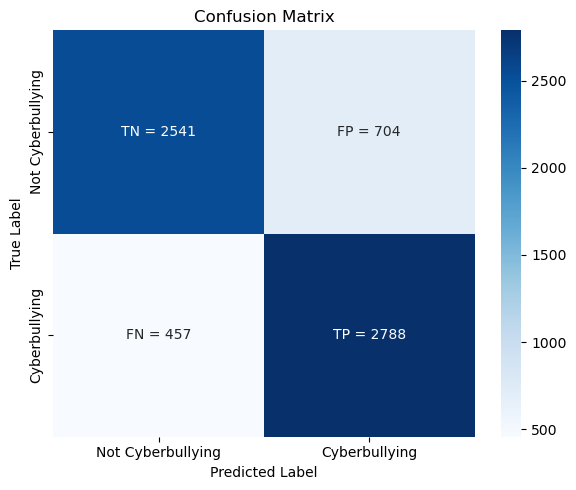


Classification Report:
                   precision    recall  f1-score   support

Not Cyberbullying       0.85      0.78      0.81      3245
    Cyberbullying       0.80      0.86      0.83      3245

         accuracy                           0.82      6490
        macro avg       0.82      0.82      0.82      6490
     weighted avg       0.82      0.82      0.82      6490



NameError: name 'accuracy_score' is not defined

In [19]:
# 7. Display performance metrics

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Cyberbullying', 'Cyberbullying']

# Annotate with TP, TN, FP, FN
annot_labels = [
    [f"TN = {cm[0,0]}", f"FP = {cm[0,1]}"],
    [f"FN = {cm[1,0]}", f"TP = {cm[1,1]}"]
]

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=annot_labels, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Axis labels and title
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Cyberbullying", "Cyberbullying"]))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"F1 Score: {f1:.4f}")